In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [23]:
# Thermal diffusivity in m^2/s
a = 1.22e-3
temp_left = 100.0
temp_right = 0.0
L=1.0
nx=51
sigma = 0.5
dx = (L)/(nx-1)
x = numpy.linspace(0.0, L, nx)
nt = 2000

In [24]:
temp0 = numpy.zeros(nx)
temp0[0] = 100.0

In [25]:
def ftcs_dir(temp0, sigma, nt, dx):
    temp = temp0.copy()
    dt = sigma * (dx**2)/a
    for n in range(nt):
        temp[1:-1] = temp[1:-1] + (a * dt / (dx**2)) * ( temp[:-2] - 2*temp[1:-1] + temp[2:])
        temp[0] = 100.0
        temp[-1] = 0.0
    return temp

def ftcs_neu(temp0, sigma, nt, dx):
    temp = temp0.copy()
    dt = sigma * (dx**2)/a
    for n in range(nt):
        temp[1:-1] = temp[1:-1] + (a * dt / (dx**2)) * ( temp[:-2] - 2*temp[1:-1] + temp[2:])
        temp[0] = 100.0
        temp[-1] = temp[-2]
    return temp

In [26]:
temp_dir = ftcs_dir(temp0, sigma, nt, dx)
temp_neu = ftcs_neu(temp0, sigma, nt, dx)

(0, 1.0)

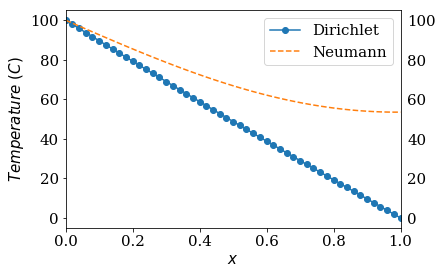

In [27]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 15
pyplot.tick_params(labelright=True)
pyplot.plot(x,temp_dir, label = 'Dirichlet', linestyle = '-', marker = 'o');
pyplot.plot(x,temp_neu, label = 'Neumann', linestyle = '--');
pyplot.legend(loc='best')
pyplot.xlabel('$x$')
pyplot.ylabel('$Temperature \ (C)$')
pyplot.xlim(0,1.0)